# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

In [1]:
dataDir = "G:AV datasets/inD-dataset-v1.0/data/"
dataDir = "E:/Datasets/inD-dataset-v1.0/data/"

In [2]:
exec(open('init_notebook.py').read())

current working dirD:\AV\DataSetExploration\drone-dataset-tools\src


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import logging
logging.basicConfig(level=logging.INFO)

from loguru import logger
logger.remove()
logger.add(sys.stdout, format="{level} {message}", filter="my_module", level="INFO")

from extractors.loader import Loader

In [5]:
loader = Loader(dataDir, 'inD')

In [6]:
recordingData = loader.getRecordingData('19') 
recordingData.backgroundImagePath

INFO:root:Downsampling recording 19 from 25.0 to 2.5
downsampling: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 492008/492008 [00:20<00:00, 24241.95it/s]


'E:/Datasets/inD-dataset-v1.0/data/19_background.png'

In [7]:
recordingData.tracksMetaDf.head()

,recordingId,trackId,initialFrame,finalFrame,numFrames,width,length,class,crossing,turn,onStreet
0,19,0,0,105,106,1.97574,4.73697,car,no,no,no
1,19,1,0,65,66,1.86671,4.55969,car,no,no,no
2,19,2,0,341,342,0.00000,0.00000,pedestrian,no,yes,no
3,19,3,0,24835,24836,2.06339,4.50165,car,no,no,no
4,19,4,0,24835,24836,1.82690,4.24700,car,no,no,no


In [8]:
recordingData.tracksMetaDf["class"].unique()

array(['car', 'pedestrian', 'bicycle', 'truck_bus'], dtype=object)

In [10]:
# recordingData.getCarIds()

In [11]:
# recordingData.getLargeVehicleIds()

In [12]:
# recordingData.getBicycleIds()

In [13]:
# recordingData.getPedIds()

In [14]:
# recordingData.getVehicleIds()

In [15]:
# frameDf = recordingData.getDfByFrameSpan(0, 0)

In [16]:
# len(frameDf)

In [17]:
# recordingData.getDfById(41)

In [8]:

from tools.UnitUtils import UnitUtils
allLocationSceneConfig = UnitUtils.loadSceneConfiguration()
sceneConfigs = allLocationSceneConfig['2']
sceneId = 22
sC = sceneConfigs[str(sceneId)]
print(sC)
sceneData = recordingData.getSceneData(sceneId, sC, refresh=True)


{'centerXPixel': 188.5, 'centerYPixel': 375.5, 'centerX': 18.43, 'centerY': -36.71, 'angle': 16.0, 'roadWidth': 9.0, 'boxWidth': 20.0}


clipping other trajectories for scene # 22: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 127/127 [00:00<00:00, 143.32it/s]
INFO:root:adding pedestrian local dynamics for scene 22
deriving velocity on sceneY at fps 2.5: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 362.66it/s]
deriving acceleration on sceneXVelocity at fps 2.5: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 333.35it/s]
deriving acceleration on sceneYVelocity at fps 2.5: 100%|█████████████████████████████████████████████████████████████████████████████

In [9]:
sceneData.locationId

2

In [10]:
crossingDf = sceneData.getPedDataInSceneCorrdinates()
crossingDf.head()

,recordingId,trackId,frame,trackLifetime,xCenter,yCenter,heading,width,length,xVelocity,...,yAcceleration,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration
2,19,72,4540,340,26.19528,-29.97615,238.77605,0.0,0.0,-0.52503,...,0.1434,19072,22,9.0,9.320567,4.332591,0.776260,0.678388,0.241086,-0.044228
3,19,72,4550,350,25.99944,-30.29269,242.4037,0.0,0.0,-0.44166,...,0.12559,19072,22,9.0,9.045063,4.082294,0.688759,0.625742,0.218752,0.131615
4,19,72,4560,360,25.84202,-30.58483,246.08436,0.0,0.0,-0.30992,...,-0.00132,19072,22,9.0,8.813217,3.844862,0.579616,0.593580,0.272858,0.080405
5,19,72,4570,370,25.74525,-30.86465,249.51171,0.0,0.0,-0.21941,...,-0.19737,19072,22,9.0,8.643066,3.602555,0.425375,0.605767,0.385602,-0.030467
6,19,72,4580,380,25.66758,-31.18894,252.38229,0.0,0.0,-0.22207,...,-0.30787,19072,22,9.0,8.479019,3.312236,0.410119,0.725797,0.038141,-0.300075


In [11]:
sceneData.uniquePedIds()

<IntegerArray>
[19072, 19075, 19081, 19125, 19343]
Length: 5, dtype: Int64

In [12]:
sceneData.uniqueOtherIds()

<IntegerArray>
[19016, 19018, 19023, 19025, 19028, 19036, 19043, 19048, 19052, 19061,
 ...
 19330, 19333, 19342, 19345, 19347, 19351, 19354, 19355, 19367, 19273]
Length: 127, dtype: Int64

In [13]:
otherDf = sceneData.getOtherDataInSceneCorrdinates()
otherDf.head()

,recordingId,trackId,frame,trackLifetime,xCenter,yCenter,heading,width,length,xVelocity,...,uniqueTrackId,sceneId,roadWidth,class,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration
2,19,16,252,20,22.58134,-36.37444,14.42102,2.06353,5.15411,9.29739,...,19016,22,9.0,car,4.083017,-0.821703,-9.805077,0.330342,-0.208532,0.016493
3,19,16,262,30,26.19275,-35.48898,13.7152,2.06353,5.15411,8.72813,...,19016,22,9.0,car,7.798593,-0.965984,-9.288940,0.360702,-1.290344,-0.075898
4,19,16,272,40,29.54836,-34.72084,13.10055,2.06353,5.15411,8.05783,...,19016,22,9.0,car,11.235940,-1.152532,-8.593369,0.466370,-1.738928,-0.264170
5,19,16,282,50,32.64791,-34.04895,12.52601,2.06353,5.15411,7.39573,...,19016,22,9.0,car,14.400617,-1.361022,-7.911692,0.521224,-1.704192,-0.137136
6,19,16,292,60,35.49118,-33.49096,11.25622,2.06353,5.15411,7.0015,...,19016,22,9.0,car,17.287546,-1.608359,-7.217324,0.618343,-1.735920,-0.242796


In [14]:
# sceneData._clipPed(0.0)

In [15]:
from tools.TrajectoryUtils import TrajectoryUtils
from tools.TrajectoryVisualizer import TrajectoryVisualizer
import matplotlib.pyplot as plt
import numpy as np
visualizer = TrajectoryVisualizer(loader)

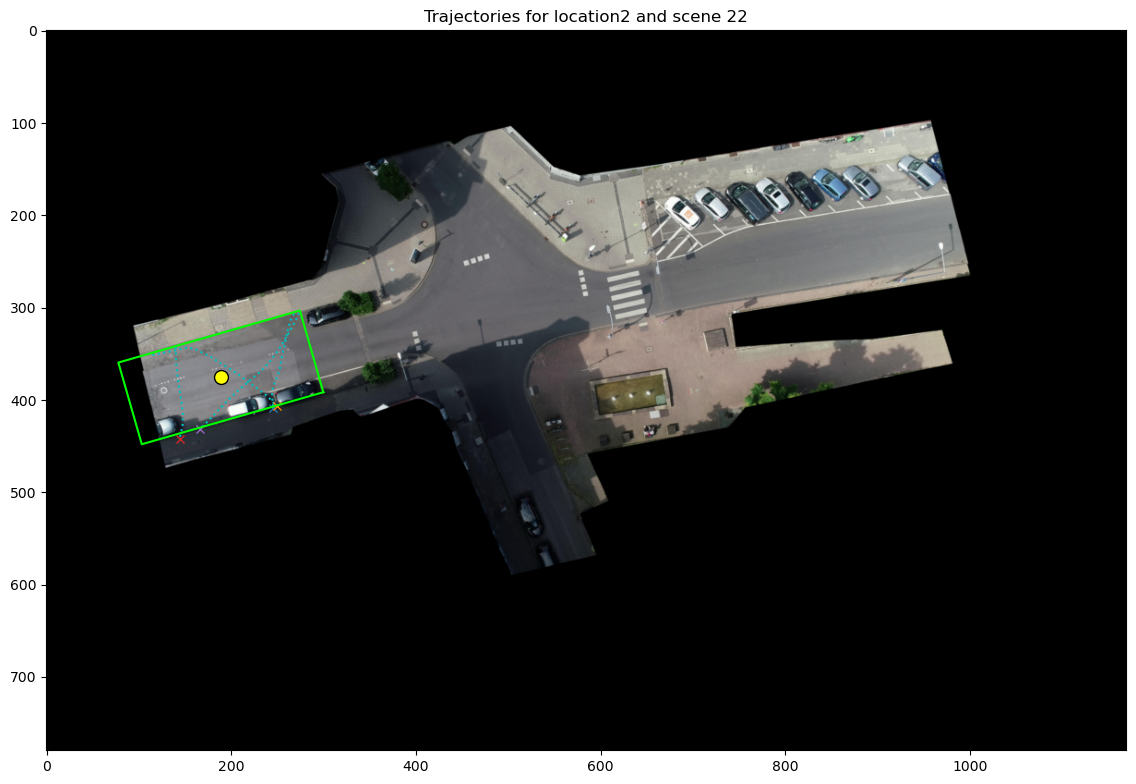

In [16]:
# visualizer.showLocationSceneData(sceneData, onlyClipped=True, showOthers=True)
visualizer.showLocationSceneData(sceneData, onlyClipped=True, showOthers=False)

In [28]:
localMeta = sceneData.getMeta()

In [29]:
localMeta

,uniqueTrackId,initialFrame,finalFrame,numFrames,class,horizontalDirection,verticalDirection
0,19072,4540.0,4550.0,23,pedestrian,TrackDirection.WEST,TrackDirection.SOUTH
1,19075,4425.0,4435.0,26,pedestrian,TrackDirection.EAST,TrackDirection.SOUTH
2,19125,8342.0,8352.0,10,pedestrian,TrackDirection.WEST,TrackDirection.SOUTH
3,19343,23440.0,23450.0,25,pedestrian,TrackDirection.WEST,TrackDirection.SOUTH
4,19016,232.0,242.0,13,car,TrackDirection.EAST,TrackDirection.SOUTH
...,...,...,...,...,...,...,...
125,19351,23705.0,23715.0,23,bicycle,TrackDirection.EAST,TrackDirection.SOUTH
126,19354,24090.0,24100.0,15,bicycle,TrackDirection.EAST,TrackDirection.SOUTH
127,19355,24103.0,24113.0,16,bicycle,TrackDirection.EAST,TrackDirection.SOUTH
128,19367,24655.0,24665.0,15,bicycle,TrackDirection.EAST,TrackDirection.SOUTH


In [15]:
sceneData.uniquePedIds()

<IntegerArray>
[19072, 19075, 19081, 19125, 19343]
Length: 5, dtype: Int64

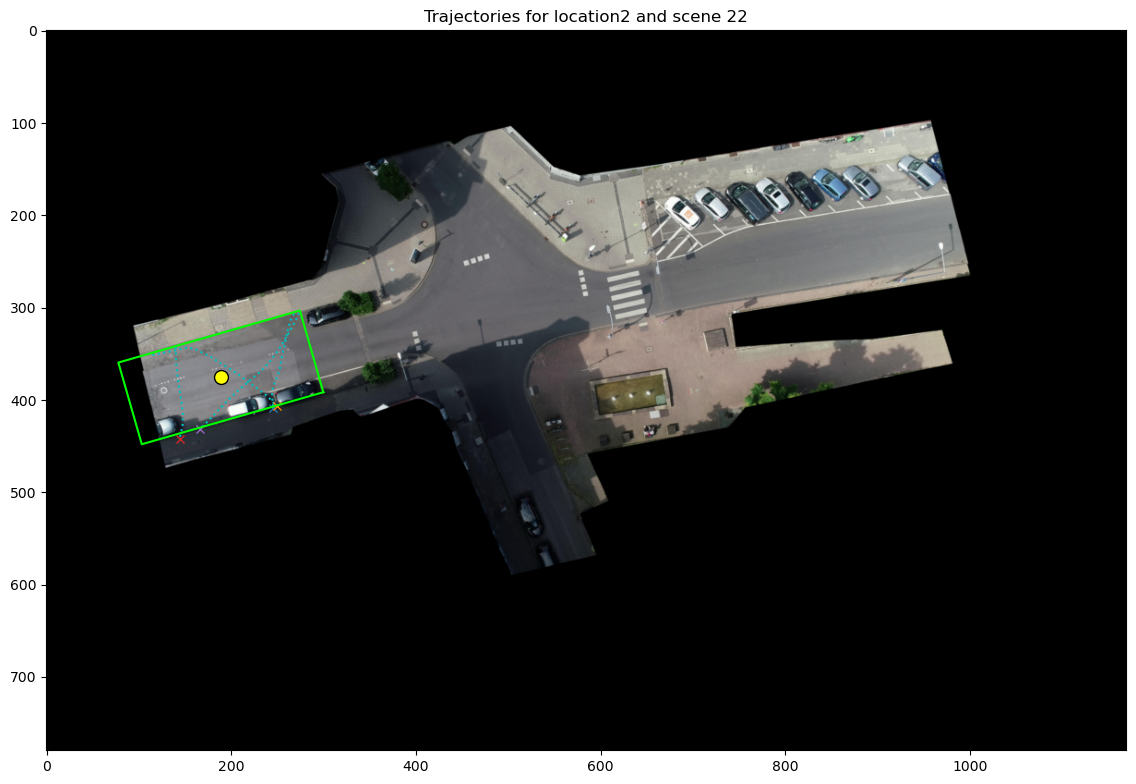

In [20]:
visualizer.showLocationSceneData(sceneData, onlyClipped=True)

In [23]:
from tools.TrajectoryUtils import TrajectoryUtils
trimmedLocalDf = TrajectoryUtils.trimHeadAndTailForAll(localDf)

trimming trajectories: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 666.69it/s]


In [29]:
len(trimmedLocalDf)

76

In [25]:
len(localDf)

84